In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [7]:
dat = pd.read_csv('bearing_4_prediction_data.csv', index_col= 0)
dat.head()

,x_mean,y_mean,x_std,y_std,x_rms,y_rms,x_sf,y_sf,x_peak_count,y_peak_count,bearing_condition
0,-0.090969,-0.094235,0.060086,0.066382,0.109020,0.115267,0.096071,0.145048,13,43,0
1,-0.091260,-0.087946,0.059421,0.064746,0.108900,0.109208,0.091647,0.148553,10,29,0
2,-0.092597,-0.093106,0.059969,0.065255,0.110319,0.113696,0.089017,0.139277,11,21,0
3,-0.093485,-0.093244,0.059917,0.066303,0.111037,0.114413,0.090138,0.140414,5,22,0
4,-0.104769,-0.093042,0.058607,0.065404,0.120046,0.113729,0.075905,0.142373,2,24,0


In [5]:


# Load your data
# Assuming 'data' is your dataframe
X = dat.drop('bearing_condition', axis=1)
y = dat['bearing_condition']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()

# Train the models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the models
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


c:\Users\danin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8898550724637682
Random Forest Accuracy: 0.9014492753623189
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        29
           1       0.87      0.92      0.89       143
           2       0.77      0.76      0.76        66
           3       1.00      0.88      0.94        58
           4       0.92      1.00      0.96        49

    accuracy                           0.89       345
   macro avg       0.91      0.89      0.90       345
weighted avg       0.89      0.89      0.89       345

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        29
           1       0.90      0.90      0.90       143
           2       0.80      0.79      0.79        66
           3       1.00      0.93      0.96        58
           4       0.92      1.00      0.96        49

    accurac

Random Forest Best Model Mean Squared Error: 0.06937580865016786
Random Forest Best Model R2 Score: 0.9528037515741528


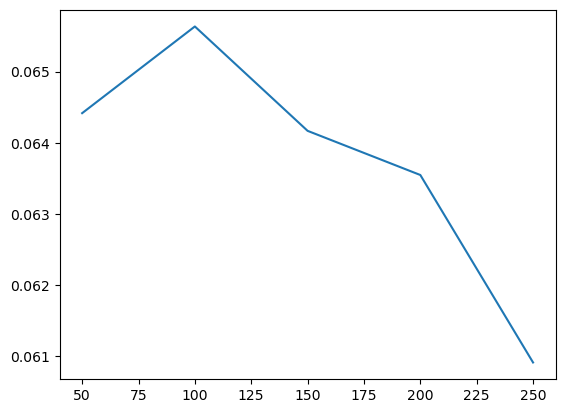

In [8]:
    # Define hyperparameter grid for Random Forest Regression
param_grid_rf = {
   'n_estimators': [20, 50, 90],
   'max_depth': [3, 5, 8],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 4, 8]
}
# Define hyperparameter grid for AdaBoostRegressor (for comparison)
param_grid_adaboost = {'n_estimators': [20, 50, 90]}
# Create Random Forest Regressor and AdaBoostRegressor objects
rf_reg = RandomForestRegressor()
ada_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())
# **Grid Search for Random Forest Regression:**
grid_search_rf = GridSearchCV(rf_reg, param_grid_rf, scoring='neg_mean_squared_error', cv=5)
grid_search_rf.fit(X_train, y_train)
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
# **Comparison by Plotting Performance vs Number of Trees (for Random Forest):**
n_estimators_range = range(50, 251, 50)  # Range of number of estimators to evaluate
mse_scores_rf = []
for n_estimators in n_estimators_range:
   rf_reg = RandomForestRegressor(n_estimators=n_estimators)
   rf_reg.fit(X_train, y_train)
   y_predicted = rf_reg.predict(X_test)
   mse_scores_rf.append(mean_squared_error(y_test, y_predicted))
plt.plot(n_estimators_range, mse_scores_rf, label='Random Forest')  # Add label for clarity
best_model_rf_predictions = best_model_rf.predict(X_test)
best_model_rf_mse = mean_squared_error(y_test, best_model_rf_predictions)
best_model_rf_r2 = r2_score(y_test, best_model_rf_predictions)
# Print MSE and R2 for Random Forest
print("Random Forest Best Model Mean Squared Error:", best_model_rf_mse)
print("Random Forest Best Model R2 Score:", best_model_rf_r2)

In [9]:
param_grid_rf = {
   'n_estimators': [20, 50, 90],
   'max_depth': [3, 5, 8],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 4, 8]
}

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = GridSearchCV(rf, param_grid_rf, cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)
    

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8], 'min_samples_leaf': [1, 4, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 90]})

In [10]:
accuracy_score(y_test,rand_search.best_estimator_.predict(X_test))

0.8956521739130435

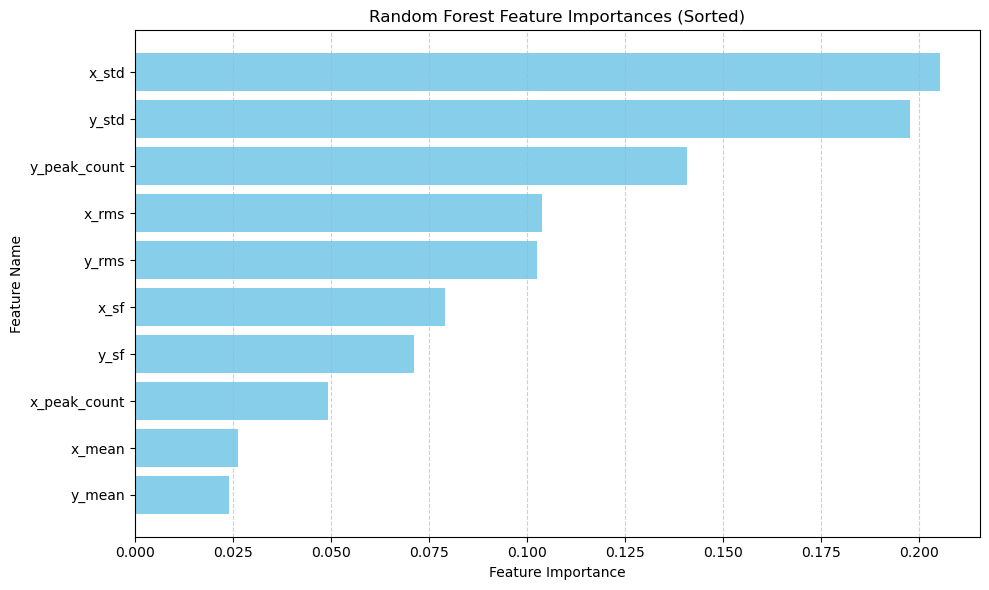

In [12]:

rf.fit(X_train, y_train)
# Get feature importances
importances = rand_search.best_estimator_.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
feature_names = X.columns[indices]
importances_sorted = importances[indices]
# Create a sorted bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
plt.barh(range(len(feature_names)), importances_sorted, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Random Forest Feature Importances (Sorted)")
plt.yticks(range(len(feature_names)), feature_names, fontsize=10)  # Adjust font size as desired
plt.gca().invert_yaxis()  # Invert y-axis to display most important feature at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()